# Imports

In [ ]:
#Canonical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Checking dataset

In [2]:
data = pd.read_csv("raw_data/Virtual_Patient_Models_Dataset.csv")
data.head()

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05T22:52:28.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24T00:00:00.000Z,80,Non of the above,0,0,No,...,3 - About the same,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10T15:04:04.000Z,72,Non of the above,1,3,No,...,3 - About the same,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10


In [3]:
data.tail()

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
112,2117,4,Pre-frail,F,2019-01-24T08:22:40.000Z,75,Non of the above,0,0,No,...,4 - A little better,3.0,> 2 h and < 5 h per week,Never smoked,2.0,6.0,31,4,0,2
113,2584,1,Frail,F,2017-01-09T00:00:00.000Z,78,NaN,0,0,No,...,2 - A little worse,3.0,> 5 h per week,Never smoked,2.0,6.0,31,0,0,4
114,2584,2,Frail,F,2017-05-02T00:00:00.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Never smoked,2.0,6.0,31,1,0,4
115,2584,3,Frail,F,2017-11-13T00:00:00.000Z,78,Non of the above,0,0,No,...,3 - About the same,3.0,> 5 h per week,Never smoked,2.0,6.0,31,3,0,4
116,2584,4,Frail,F,2018-12-10T13:34:14.000Z,79,Non of the above,0,0,No,...,3 - About the same,3.0,< 2 h per week,Never smoked,0.0,6.0,31,3,0,5


In [4]:
data.shape

(117, 59)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    object 
 12  weight_loss           

In [6]:
data.describe()

,part_id,clinical_visit,age,hospitalization_one_year,hospitalization_three_years,exhaustion_score,raise_chair_time,gait_get_up,gait_speed_4m,falls_one_year,...,social_text,stairs_number,life_quality,pain_perception,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,55.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1596.623932,2.461538,76.726496,0.239316,0.598291,1.239316,53.775043,18.719658,6.619915,0.418803,...,57.316239,3.927273,8.490598,2.452137,2.414530,5.978632,28.008547,4.487179,0.170940,4.632479
std,526.870473,1.110595,3.478069,0.582053,0.831076,0.428501,200.593772,91.527393,3.556938,1.921921,...,221.370521,6.070129,1.530832,2.228677,7.142421,0.101565,3.455370,3.390187,0.496376,3.281606
min,1084.000000,1.000000,70.000000,0.000000,0.000000,1.000000,6.900000,4.000000,2.540000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,5.500000,19.000000,0.000000,0.000000,0.000000
25%,1092.000000,1.000000,74.000000,0.000000,0.000000,1.000000,9.690000,7.430000,4.570000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.000000,6.000000,25.000000,2.000000,0.000000,2.000000
50%,1104.000000,2.000000,77.000000,0.000000,0.000000,1.000000,11.700000,9.050000,5.600000,0.000000,...,0.000000,0.000000,8.600000,2.000000,0.000000,6.000000,30.000000,4.000000,0.000000,4.000000
75%,2089.000000,3.000000,79.000000,0.000000,1.000000,1.000000,14.000000,11.800000,7.300000,0.000000,...,1.000000,4.500000,10.000000,3.500000,2.000000,6.000000,31.000000,6.000000,0.000000,7.000000
max,2584.000000,4.000000,85.000000,3.000000,3.000000,2.000000,999.000000,999.000000,22.800000,20.000000,...,999.000000,19.000000,10.000000,8.700000,63.000000,6.000000,31.000000,15.000000,2.000000,15.000000


In [7]:
data.dtypes

part_id                              int64
clinical_visit                       int64
fried                               object
gender                              object
q_date                              object
age                                  int64
comorbidities_most_important        object
hospitalization_one_year             int64
hospitalization_three_years          int64
ortho_hypotension                   object
vision                              object
audition                            object
weight_loss                         object
exhaustion_score                     int64
raise_chair_time                   float64
balance_single                      object
gait_get_up                        float64
gait_speed_4m                      float64
gait_optional_binary                  bool
gait_speed_slower                   object
grip_strength_abnormal              object
low_physical_activity               object
falls_one_year                       int64
fractures_t

In [8]:
data.columns

Index(['part_id', 'clinical_visit', 'fried', 'gender', 'q_date', 'age',
       'comorbidities_most_important', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss', 'exhaustion_score', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'mna_total', 'cognitive_total_score',
       'memory_complain', 'sleep', 'mmse_total_score',
       'depression_total_score', 'anxiety_perception', 'living_alone',
       'leisure_out', 'leisure_club', 'social_visits', 'social_calls',
       'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       

# Data Preparation

In [9]:
#Counting the number of missing values per column
data.isnull().sum().sort_values(ascending=False)

mna_total                          114
stairs_number                       62
house_suitable_professional         62
house_suitable_participant          62
lean_body_mass                      33
bmi_body_fat                        33
memory_complain                      4
cognitive_total_score                3
activity_regular                     2
leisure_club                         2
sleep                                1
comorbidities_most_important         1
waist                                1
social_calls                         0
depression_total_score               0
anxiety_perception                   0
living_alone                         0
leisure_out                          0
social_visits                        0
iadl_grade                           0
social_phone                         0
katz_index                           0
social_text                          0
mmse_total_score                     0
comorbidities_significant_count      0
comorbidities_count      

In [10]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

mna_total                          0.974359
stairs_number                      0.529915
house_suitable_professional        0.529915
house_suitable_participant         0.529915
lean_body_mass                     0.282051
bmi_body_fat                       0.282051
memory_complain                    0.034188
cognitive_total_score              0.025641
activity_regular                   0.017094
leisure_club                       0.017094
sleep                              0.008547
comorbidities_most_important       0.008547
waist                              0.008547
social_calls                       0.000000
depression_total_score             0.000000
anxiety_perception                 0.000000
living_alone                       0.000000
leisure_out                        0.000000
social_visits                      0.000000
iadl_grade                         0.000000
social_phone                       0.000000
katz_index                         0.000000
social_text                     

In [11]:
#Select some columns to drop / Dropping this way it's easier to track what columns do you want to drop out /
#and it's pratical to drop without have to write every column's names.

data = data[['part_id', 'clinical_visit', 'fried', 'gender', 'q_date', 'age',
       'comorbidities_most_important', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss',
       #'exhaustion_score',
       'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       #'gait_optional_binary', 
       'gait_speed_slower', 
       #'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score',
      #'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score',
      #'mna_total',
       'cognitive_total_score',
       'memory_complain', 'sleep', 'mmse_total_score',
       'depression_total_score', 'anxiety_perception', 'living_alone',
       'leisure_out', 'leisure_club', 
      #'social_visits',
       'social_calls',
      #'social_phone',
      #'social_skype', 'social_text',
      #'house_suitable_participant', 'house_suitable_professional', 'stairs_number',
      #'life_quality', 'health_rate', 'health_rate_comparison',
       'pain_perception', 'activity_regular',
       'smoking', 'alcohol_units', 'katz_index', 'iadl_grade',
       'comorbidities_count', 'comorbidities_significant_count',
       'medication_count']].copy()

In [12]:
data.shape

(117, 42)

In [13]:
data.isnull().sum().sort_values(ascending=False)

memory_complain                    4
cognitive_total_score              3
leisure_club                       2
activity_regular                   2
sleep                              1
comorbidities_most_important       1
mmse_total_score                   0
depression_total_score             0
anxiety_perception                 0
living_alone                       0
leisure_out                        0
part_id                            0
social_calls                       0
screening_score                    0
smoking                            0
alcohol_units                      0
katz_index                         0
iadl_grade                         0
comorbidities_count                0
comorbidities_significant_count    0
pain_perception                    0
bmi_score                          0
clinical_visit                     0
fractures_three_years              0
fried                              0
gender                             0
q_date                             0
a

In [14]:
data.dtypes

part_id                              int64
clinical_visit                       int64
fried                               object
gender                              object
q_date                              object
age                                  int64
comorbidities_most_important        object
hospitalization_one_year             int64
hospitalization_three_years          int64
ortho_hypotension                   object
vision                              object
audition                            object
weight_loss                         object
raise_chair_time                   float64
balance_single                      object
gait_get_up                        float64
gait_speed_4m                      float64
gait_speed_slower                   object
low_physical_activity               object
falls_one_year                       int64
fractures_three_years                int64
bmi_score                          float64
screening_score                      int64
cognitive_t

In [15]:
#Change the type from object to datetime

data['q_date'] = pd.to_datetime(data['q_date'])
data['q_date']

0     2016-10-05 22:52:28+00:00
1     2017-07-20 00:00:00+00:00
2     2017-12-01 00:00:00+00:00
3     2018-09-24 00:00:00+00:00
4     2016-10-10 15:04:04+00:00
                 ...           
112   2019-01-24 08:22:40+00:00
113   2017-01-09 00:00:00+00:00
114   2017-05-02 00:00:00+00:00
115   2017-11-13 00:00:00+00:00
116   2018-12-10 13:34:14+00:00
Name: q_date, Length: 117, dtype: datetime64[ns, UTC]

In [16]:
data

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,social_calls,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05 22:52:28+00:00,78,Non of the above,0,0,No,...,7,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20 00:00:00+00:00,79,Non of the above,0,0,No,...,7,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01 00:00:00+00:00,79,Non of the above,0,0,No,...,4,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24 00:00:00+00:00,80,Non of the above,0,0,No,...,5,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10 15:04:04+00:00,72,Non of the above,1,3,No,...,7,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2117,4,Pre-frail,F,2019-01-24 08:22:40+00:00,75,Non of the above,0,0,No,...,7,3.0,> 2 h and < 5 h per week,Never smoked,2.0,6.0,31,4,0,2
113,2584,1,Frail,F,2017-01-09 00:00:00+00:00,78,NaN,0,0,No,...,10,3.0,> 5 h per week,Never smoked,2.0,6.0,31,0,0,4
114,2584,2,Frail,F,2017-05-02 00:00:00+00:00,78,Non of the above,0,0,No,...,8,1.0,> 5 h per week,Never smoked,2.0,6.0,31,1,0,4
115,2584,3,Frail,F,2017-11-13 00:00:00+00:00,78,Non of the above,0,0,No,...,7,3.0,> 5 h per week,Never smoked,2.0,6.0,31,3,0,4


In [17]:
pd.set_option("display.max_rows", None)
data

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,social_calls,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05 22:52:28+00:00,78,Non of the above,0,0,No,...,7,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20 00:00:00+00:00,79,Non of the above,0,0,No,...,7,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01 00:00:00+00:00,79,Non of the above,0,0,No,...,4,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24 00:00:00+00:00,80,Non of the above,0,0,No,...,5,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10 15:04:04+00:00,72,Non of the above,1,3,No,...,7,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10
5,1085,2,Non frail,F,2017-07-28 00:00:00+00:00,73,Non of the above,1,3,No,...,20,2.2,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,10,0,10
6,1085,3,Pre-frail,F,2017-12-01 00:00:00+00:00,73,Osteoporosis if woman /Osteoarthritis if man,1,2,No,...,20,2.4,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,30,11,0,10
7,1085,4,Non frail,F,2018-09-18 21:12:36+00:00,74,MCI,1,1,No,...,20,3.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,26,11,2,10
8,1086,1,Non frail,M,2016-10-12 10:34:24+00:00,76,Non of the above,0,1,No,...,14,1.2,> 5 h per week,Past smoker (stopped at least 6 months),63.0,6.0,29,4,0,3
9,1086,2,Non frail,M,2017-07-07 00:00:00+00:00,77,Non of the above,0,1,No,...,15,1.5,> 5 h per week,Past smoker (stopped at least 6 months),20.0,6.0,25,4,0,3


In [18]:
data.dtypes

part_id                                          int64
clinical_visit                                   int64
fried                                           object
gender                                          object
q_date                             datetime64[ns, UTC]
age                                              int64
comorbidities_most_important                    object
hospitalization_one_year                         int64
hospitalization_three_years                      int64
ortho_hypotension                               object
vision                                          object
audition                                        object
weight_loss                                     object
raise_chair_time                               float64
balance_single                                  object
gait_get_up                                    float64
gait_speed_4m                                  float64
gait_speed_slower                               object
low_physic

In [19]:
data_without_object_types = data.select_dtypes(exclude=["object","datetime64"])
data_without_object_types

,part_id,clinical_visit,q_date,age,hospitalization_one_year,hospitalization_three_years,raise_chair_time,gait_get_up,gait_speed_4m,falls_one_year,...,anxiety_perception,leisure_out,social_calls,pain_perception,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,2016-10-05 22:52:28+00:00,78,0,0,14.00,9.05,8.80,0,...,1.3,7,7,1.2,1.5,6.0,29,6,2,5
1,1084,2,2017-07-20 00:00:00+00:00,79,0,0,13.46,10.30,6.20,0,...,1.7,7,7,1.0,21.0,6.0,25,7,0,6
2,1084,3,2017-12-01 00:00:00+00:00,79,0,0,13.40,9.40,7.20,0,...,2.2,7,4,1.3,14.0,6.0,24,7,0,6
3,1084,4,2018-09-24 00:00:00+00:00,80,0,0,14.10,9.20,6.45,0,...,4.8,8,5,2.5,18.0,6.0,26,8,0,7
4,1085,1,2016-10-10 15:04:04+00:00,72,1,3,16.00,9.80,4.70,0,...,10.0,7,7,2.5,0.0,6.0,31,11,1,10
5,1085,2,2017-07-28 00:00:00+00:00,73,1,3,15.40,11.80,5.20,0,...,10.0,7,20,2.2,0.0,6.0,31,10,0,10
6,1085,3,2017-12-01 00:00:00+00:00,73,1,2,15.70,10.40,5.10,0,...,10.0,7,20,2.4,0.0,6.0,30,11,0,10
7,1085,4,2018-09-18 21:12:36+00:00,74,1,1,15.20,10.10,5.20,0,...,10.0,7,20,3.5,0.0,6.0,26,11,2,10
8,1086,1,2016-10-12 10:34:24+00:00,76,0,1,9.25,6.75,4.00,0,...,8.2,14,14,1.2,63.0,6.0,29,4,0,3
9,1086,2,2017-07-07 00:00:00+00:00,77,0,1,8.47,6.32,4.07,0,...,7.9,20,15,1.5,20.0,6.0,25,4,0,3


In [20]:
correlation_matrix = data_without_object_types.corr()
correlation_matrix

,part_id,clinical_visit,q_date,age,hospitalization_one_year,hospitalization_three_years,raise_chair_time,gait_get_up,gait_speed_4m,falls_one_year,...,anxiety_perception,leisure_out,social_calls,pain_perception,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
part_id,1.000000,-0.033439,-0.023593,0.257479,0.114117,-0.064570,-0.200147,-0.104200,-0.042935,0.060849,...,-0.376640,-0.062555,-0.417796,-0.267806,-0.190333,0.036660,-0.025090,-0.624299,-0.005751,-0.494876
clinical_visit,-0.033439,1.000000,0.972877,0.191417,-0.065654,-0.124293,-0.048878,-0.117050,-0.123681,0.086368,...,-0.107402,0.009354,0.095206,-0.009457,-0.052583,-0.064669,0.016935,0.086301,-0.050522,0.049309
q_date,-0.023593,0.972877,1.000000,0.188736,-0.098687,-0.141987,-0.048483,-0.100473,-0.110323,0.108584,...,-0.097296,0.019799,0.071890,-0.018472,-0.046755,-0.045597,0.002485,0.092898,-0.053895,0.071872
age,0.257479,0.191417,0.188736,1.000000,-0.039781,-0.026408,0.115836,0.072029,0.227054,0.114006,...,-0.361780,0.084110,-0.042623,0.085377,0.056483,-0.138707,-0.317574,0.012860,-0.047586,0.023595
hospitalization_one_year,0.114117,-0.065654,-0.098687,-0.039781,1.000000,0.592519,-0.084482,-0.044398,-0.154055,0.032933,...,0.008684,-0.105535,0.028025,-0.086125,-0.110125,-0.350234,-0.065321,-0.181919,0.006376,-0.161167
hospitalization_three_years,-0.064570,-0.124293,-0.141987,-0.026408,0.592519,1.000000,0.002686,-0.069894,-0.100098,0.095442,...,0.019545,0.134432,0.082067,0.138002,0.017403,-0.204699,-0.127879,-0.027851,-0.124669,-0.010347
raise_chair_time,-0.200147,-0.048878,-0.048483,0.115836,-0.084482,0.002686,1.000000,0.465146,0.617118,-0.044957,...,-0.034762,-0.170589,0.167379,0.325286,-0.067229,-0.375541,-0.071727,0.349419,0.014428,0.376766
gait_get_up,-0.104200,-0.117050,-0.100473,0.072029,-0.044398,-0.069894,0.465146,1.000000,0.455581,-0.017877,...,-0.031352,-0.000725,0.105777,0.150498,-0.039496,-0.003154,-0.031866,0.178599,-0.031378,0.176550
gait_speed_4m,-0.042935,-0.123681,-0.110323,0.227054,-0.154055,-0.100098,0.617118,0.455581,1.000000,0.038492,...,0.017478,-0.127347,0.080389,0.362600,-0.114647,-0.279321,-0.070134,0.287770,-0.002238,0.382174
falls_one_year,0.060849,0.086368,0.108584,0.114006,0.032933,0.095442,-0.044957,-0.017877,0.038492,1.000000,...,-0.013006,-0.040456,-0.003056,0.124269,-0.062368,-0.042088,0.077343,0.107338,-0.021471,0.187270


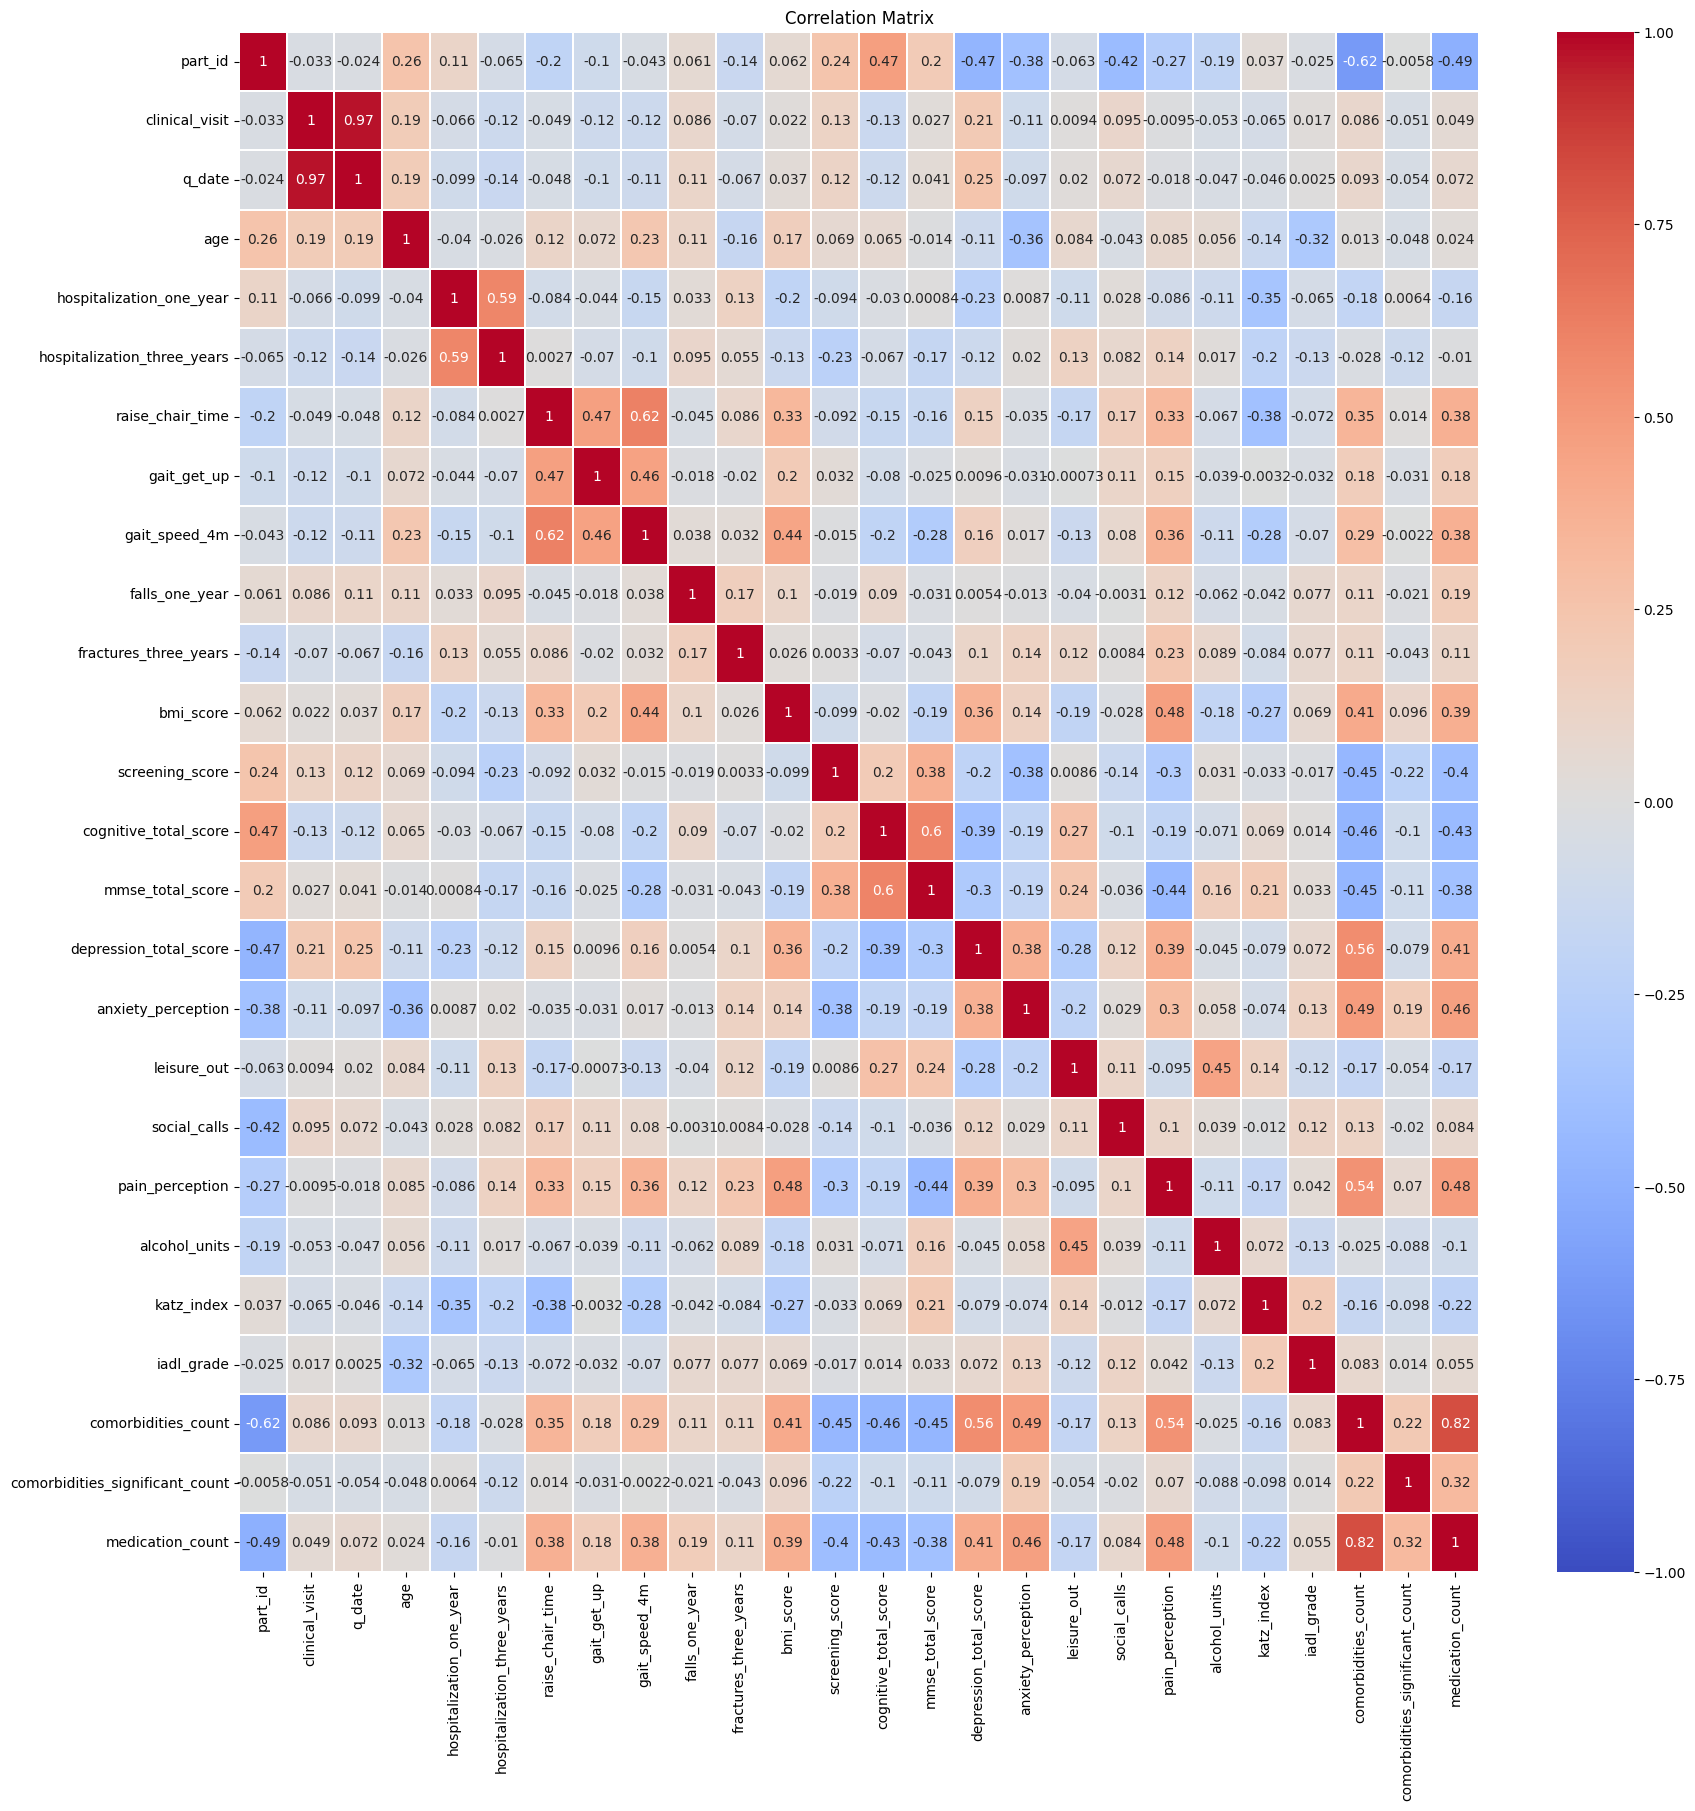

In [29]:
plt.figure(figsize = (20,20))

sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.01)
plt.title("Correlation Matrix");

In [30]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

part_id                          part_id                            1.000000
                                 clinical_visit                    -0.033439
                                 q_date                            -0.023593
                                 age                                0.257479
                                 hospitalization_one_year           0.114117
                                 hospitalization_three_years       -0.064570
                                 raise_chair_time                  -0.200147
                                 gait_get_up                       -0.104200
                                 gait_speed_4m                     -0.042935
                                 falls_one_year                     0.060849
                                 fractures_three_years             -0.143175
                                 bmi_score                          0.061556
                                 screening_score                    0.243149

In [31]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

comorbidities_count              part_id                           -0.624299
part_id                          comorbidities_count               -0.624299
                                 medication_count                  -0.494876
medication_count                 part_id                           -0.494876
depression_total_score           part_id                           -0.466862
part_id                          depression_total_score            -0.466862
comorbidities_count              cognitive_total_score             -0.462295
cognitive_total_score            comorbidities_count               -0.462295
comorbidities_count              mmse_total_score                  -0.453683
mmse_total_score                 comorbidities_count               -0.453683
comorbidities_count              screening_score                   -0.452553
screening_score                  comorbidities_count               -0.452553
mmse_total_score                 pain_perception                   -0.436523

In [32]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

pain_perception                  comorbidities_count                0.535372
comorbidities_count              pain_perception                    0.535372
depression_total_score           comorbidities_count                0.559863
comorbidities_count              depression_total_score             0.559863
hospitalization_one_year         hospitalization_three_years        0.592519
hospitalization_three_years      hospitalization_one_year           0.592519
mmse_total_score                 cognitive_total_score              0.598375
cognitive_total_score            mmse_total_score                   0.598375
raise_chair_time                 gait_speed_4m                      0.617118
gait_speed_4m                    raise_chair_time                   0.617118
medication_count                 comorbidities_count                0.815129
comorbidities_count              medication_count                   0.815129
q_date                           clinical_visit                     0.972877

In [41]:
high_corr_df = pd.DataFrame(data=high_corr, columns=["corr_value"])
high_corr_df

,,corr_value
pain_perception,comorbidities_count,0.535372
comorbidities_count,pain_perception,0.535372
depression_total_score,comorbidities_count,0.559863
comorbidities_count,depression_total_score,0.559863
hospitalization_one_year,hospitalization_three_years,0.592519
hospitalization_three_years,hospitalization_one_year,0.592519
mmse_total_score,cognitive_total_score,0.598375
cognitive_total_score,mmse_total_score,0.598375
raise_chair_time,gait_speed_4m,0.617118
gait_speed_4m,raise_chair_time,0.617118


In [42]:
high_corr_df = high_corr_df.head(12)
high_corr_df

,,corr_value
pain_perception,comorbidities_count,0.535372
comorbidities_count,pain_perception,0.535372
depression_total_score,comorbidities_count,0.559863
comorbidities_count,depression_total_score,0.559863
hospitalization_one_year,hospitalization_three_years,0.592519
hospitalization_three_years,hospitalization_one_year,0.592519
mmse_total_score,cognitive_total_score,0.598375
cognitive_total_score,mmse_total_score,0.598375
raise_chair_time,gait_speed_4m,0.617118
gait_speed_4m,raise_chair_time,0.617118
